<a href="https://colab.research.google.com/github/ladyj-dev/Wine_All_You_Want/blob/main/wine_data_cleansing_by_variety.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data cleansing to view shape, features, data types, drop null/missing values and duplicates. Adding columns and prepping for ML.

In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# bring in csv from AWS bucket(url)
url = "https://winedata150k.s3.us-east-2.amazonaws.com/winemag-data_first150k.csv"


In [3]:
# create pd dataframe
wine_all_you_want_df = pd.read_csv(url)
wine_all_you_want_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [4]:
# view shape of data(# of columns and rows)
wine_all_you_want_df.shape

(150930, 11)

In [5]:
# first step look for duplicates in features to began data cleansing process
wine_all_you_want_df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [6]:
# df.tail to confirm observation that feature "Unnamed" appears to be the same as index
wine_all_you_want_df.tail()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset
150929,150929,Italy,More Pinot Grigios should taste like this. A r...,NaN,90,15.0,Northeastern Italy,Alto Adige,NaN,Pinot Grigio,Alois Lageder


In [7]:
# "Unnamed" is definitely the same as index so drop it like it's hot
wine_all_you_want_df.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
# visualize updated features
wine_all_you_want_df.columns


Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [9]:
# view data info 
wine_all_you_want_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150930 non-null  object 
 2   designation  105195 non-null  object 
 3   points       150930 non-null  int64  
 4   price        137235 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     125870 non-null  object 
 7   region_2     60953 non-null   object 
 8   variety      150930 non-null  object 
 9   winery       150930 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 11.5+ MB


Observations: 
1. points and price are already in the format I need them to be (int/float)
2. some features have null/missing values
3. there are half as many region 2's as region 1
4. there are roughly 13,000+ rows with no price
5. there are over 45,000 rows with no name
6. there are 5 wines without a country


Began cleansing data based on observations above

In [10]:
# drop region 2
wine_all_you_want_df.drop(columns=['region_2'], inplace=True)

In [11]:
# visualize updated features
wine_all_you_want_df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'variety', 'winery'],
      dtype='object')

In [12]:
# drop missing price values to normalize data
wine_all_you_want_df.dropna(subset=['price'], inplace=True)
wine_all_you_want_df.count(0)

country        137230
description    137235
designation     94924
points         137235
price          137235
province       137230
region_1       114393
variety        137235
winery         137235
dtype: int64

In [13]:
# drop wines wines with no country
wine_all_you_want_df.dropna(subset=['country'], inplace=True)
wine_all_you_want_df.count(0)

country        137230
description    137230
designation     94919
points         137230
price          137230
province       137230
region_1       114393
variety        137230
winery         137230
dtype: int64

Determine if it makes sense to change the name of my features

In [14]:
# it makes more sense for feature "designation" to be called "wine name"
wine_all_you_want_df = wine_all_you_want_df.rename(columns={"designation": "wine_name"})
wine_all_you_want_df

,country,description,wine_name,points,price,province,region_1,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,Champagne Blend,Gosset


Need to address the fact that there are 40,000+ wines with no name.

In [15]:
# manipulate the data by combining features "variety" and "winery" as a filler/psuedo name for the missing wine names
# create a new column to reflect this concatenation (that word always makes me feel like an analyst :)
wine_all_you_want_df["variety_from_winery"] = wine_all_you_want_df["variety"] + "_from_" + wine_all_you_want_df["winery"]
wine_all_you_want_df.head() 

,country,description,wine_name,points,price,province,region_1,variety,winery,variety_from_winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz,Cabernet Sauvignon_from_Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez,Tinta de Toro_from_Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley,Sauvignon Blanc_from_Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi,Pinot Noir_from_Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude,Provence red blend_from_Domaine de la Bégude


Determine if features need to be reordered for better readability.

In [16]:
column_names = ["country", "province", "region_1", "variety", "winery", "variety_from_winery", "wine_name", "points", "price", "description"]

wine_all_you_want_df = wine_all_you_want_df.reindex(columns=column_names)
# visualize a large sample to visualize feature updates and explore missing data that was evident above in cell 13 (wine_all_you_want_df.count)
wine_all_you_want_df.head(15)
wine_all_you_want_df.tail(20)

,country,province,region_1,variety,winery,variety_from_winery,wine_name,points,price,description
150909,France,Burgundy,Nuits-St.-Georges,Pinot Noir,Daniel Rion,Pinot Noir_from_Daniel Rion,Clos dea Argillieres,89,52.0,"This is a lovely, fragrant Burgundy, with a sm..."
150910,France,Burgundy,Chambolle-Musigny,Pinot Noir,Michel Gros,Pinot Noir_from_Michel Gros,NaN,89,38.0,Scents of graham cracker and malted milk choco...
150911,France,Burgundy,Nuits-St.-Georges,Pinot Noir,Michel Gros,Pinot Noir_from_Michel Gros,Les Chaliots,87,37.0,"This needs a good bit of breathing time, then ..."
150912,France,Burgundy,Chambolle-Musigny,Pinot Noir,Daniel Rion,Pinot Noir_from_Daniel Rion,Les Charmes,87,65.0,The nose is dominated by the attractive scents...
150913,France,Rhône Valley,Châteauneuf-du-Pape,Rhône-style Red Blend,Le Vieux Donjon,Rhône-style Red Blend_from_Le Vieux Donjon,NaN,94,30.0,"Inky and rustic, yet in a refined manner. This..."
150914,US,California,Anderson Valley,White Riesling,Navarro,White Riesling_from_Navarro,Late Harvest Cluster Select,94,25.0,"Old-gold in color, and thick and syrupy. The a..."
150915,US,California,North Coast,White Blend,Beringer,White Blend_from_Beringer,Nightingale,93,30.0,"Decades ago, Beringer’s then-winemaker Myron N..."
150916,US,California,Napa Valley,Champagne Blend,Schramsberg,Champagne Blend_from_Schramsberg,J. Schram,93,65.0,An impressive wine that presents a full bouque...
150917,France,Champagne,Champagne,Champagne Blend,Jacquart,Champagne Blend_from_Jacquart,Brut Mosaïque,92,30.0,"Light and elegant, this spicy, lively wine is ..."
150918,France,Champagne,Champagne,Champagne Blend,Jacquart,Champagne Blend_from_Jacquart,Cuvée Mosaïque,92,38.0,"Jacquart makes a full-bodied, ripe style of Ch..."


Observation: rows 150910,150913,150925,150929 have NaN values, need to manipulate data to address these gaps.

In [17]:
# sample above shows missing values in feature "wine_name" only, explore all missing values
wine_all_you_want_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137230 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   country              137230 non-null  object 
 1   province             137230 non-null  object 
 2   region_1             114393 non-null  object 
 3   variety              137230 non-null  object 
 4   winery               137230 non-null  object 
 5   variety_from_winery  137230 non-null  object 
 6   wine_name            94919 non-null   object 
 7   points               137230 non-null  int64  
 8   price                137230 non-null  float64
 9   description          137230 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 11.5+ MB


Manipulate data to account for missing values determined from .info
Use fill forward to fill in missing values with preceeding value.
I love this function, thank you pandas-docs which says in part regarding this method: 'Method to use for filling holes in reindexed Series pad / ffill: propagate last valid observation forward to next valid backfill / bfill: use next valid observation to fill gap.'

In [18]:
wine_all_you_want_df = wine_all_you_want_df.fillna(method="ffill", axis="columns")
# visualize a large sample to see how the method worked
wine_all_you_want_df.tail(20)

,country,province,region_1,variety,winery,variety_from_winery,wine_name,points,price,description
150909,France,Burgundy,Nuits-St.-Georges,Pinot Noir,Daniel Rion,Pinot Noir_from_Daniel Rion,Clos dea Argillieres,89,52,"This is a lovely, fragrant Burgundy, with a sm..."
150910,France,Burgundy,Chambolle-Musigny,Pinot Noir,Michel Gros,Pinot Noir_from_Michel Gros,Pinot Noir_from_Michel Gros,89,38,Scents of graham cracker and malted milk choco...
150911,France,Burgundy,Nuits-St.-Georges,Pinot Noir,Michel Gros,Pinot Noir_from_Michel Gros,Les Chaliots,87,37,"This needs a good bit of breathing time, then ..."
150912,France,Burgundy,Chambolle-Musigny,Pinot Noir,Daniel Rion,Pinot Noir_from_Daniel Rion,Les Charmes,87,65,The nose is dominated by the attractive scents...
150913,France,Rhône Valley,Châteauneuf-du-Pape,Rhône-style Red Blend,Le Vieux Donjon,Rhône-style Red Blend_from_Le Vieux Donjon,Rhône-style Red Blend_from_Le Vieux Donjon,94,30,"Inky and rustic, yet in a refined manner. This..."
150914,US,California,Anderson Valley,White Riesling,Navarro,White Riesling_from_Navarro,Late Harvest Cluster Select,94,25,"Old-gold in color, and thick and syrupy. The a..."
150915,US,California,North Coast,White Blend,Beringer,White Blend_from_Beringer,Nightingale,93,30,"Decades ago, Beringer’s then-winemaker Myron N..."
150916,US,California,Napa Valley,Champagne Blend,Schramsberg,Champagne Blend_from_Schramsberg,J. Schram,93,65,An impressive wine that presents a full bouque...
150917,France,Champagne,Champagne,Champagne Blend,Jacquart,Champagne Blend_from_Jacquart,Brut Mosaïque,92,30,"Light and elegant, this spicy, lively wine is ..."
150918,France,Champagne,Champagne,Champagne Blend,Jacquart,Champagne Blend_from_Jacquart,Cuvée Mosaïque,92,38,"Jacquart makes a full-bodied, ripe style of Ch..."


In [20]:
# Observation: rows 150910,150913,150925,150929 now have values that are a concatenation of features "province" and "variety_from_winery"

In [21]:
#I know this method worked on the 4 samples I was tracking. However need to confirm that fillna method worked on entire dataset
wine_all_you_want_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137230 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              137230 non-null  object
 1   province             137230 non-null  object
 2   region_1             137230 non-null  object
 3   variety              137230 non-null  object
 4   winery               137230 non-null  object
 5   variety_from_winery  137230 non-null  object
 6   wine_name            137230 non-null  object
 7   points               137230 non-null  object
 8   price                137230 non-null  object
 9   description          137230 non-null  object
dtypes: object(10)
memory usage: 11.5+ MB


The method worked however now points and price have incorrect dtypes so I need to reassign them back to int and float.

In [35]:
# reassign "points" and "price" as integer and float
wine_all_you_want_df = wine_all_you_want_df.astype({
    "points": "int",
    "price": "float"
})
wine_all_you_want_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134428 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   country              134428 non-null  object 
 1   province             134428 non-null  object 
 2   region_1             134428 non-null  object 
 3   variety              134428 non-null  object 
 4   winery               134428 non-null  object 
 5   variety_from_winery  134428 non-null  object 
 6   wine_name            134428 non-null  object 
 7   points               134428 non-null  int64  
 8   price                134428 non-null  float64
 9   description          134428 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 11.3+ MB


Determine if the feature samples are large enough to provide sufficient visualization. Drop those that are not large enough to allow me to reduce the amount of countries to make data easier to visual.

In [36]:
# determine number of individual countries
wine_all_you_want_df["country"].nunique()

12

In [37]:
# how many wines per country
wine_all_you_want_df["country"].value_counts()

US              62139
Italy           18784
France          14785
Spain            8160
Chile            5766
Argentina        5587
Australia        4894
Portugal         4176
New Zealand      3070
Austria          2483
Germany          2347
South Africa     2237
Name: country, dtype: int64

There are 46 countries but by reducing the amount of countries to the top 12 it allows me to visualize better by using a unique color for each country.

In [38]:
# drop any countries that don't have at least 2000 wines
wine_all_you_want_df = wine_all_you_want_df[wine_all_you_want_df.groupby("country")["country"].transform("size")>=2000]
wine_all_you_want_df["country"].value_counts()

US              62139
Italy           18784
France          14785
Spain            8160
Chile            5766
Argentina        5587
Australia        4894
Portugal         4176
New Zealand      3070
Austria          2483
Germany          2347
South Africa     2237
Name: country, dtype: int64

This reduction results in just a dozen countries

In [ ]:
Now I wish to explore the spread of the data, an earlier notebook I did showed the presence of outliers and I want to remove them.

In [39]:
import matplotlib.pyplot as plt


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f863cf41d68>,
      dtype=object)

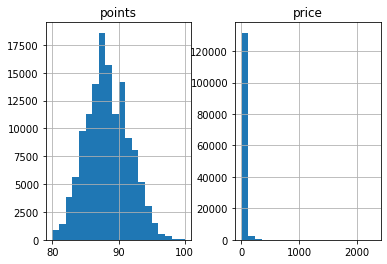

In [40]:
wine_all_you_want_df.hist(bins=20)

{'boxes': [<matplotlib.lines.Line2D at 0x7f863c4bb208>],
 'caps': [<matplotlib.lines.Line2D at 0x7f863c4bbc18>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f863c4c56d8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f863c4c5358>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f863c4bb518>,
  <matplotlib.lines.Line2D at 0x7f863c4bb898>]}

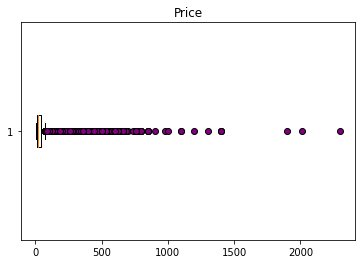

In [43]:
# Obvious from visualization above that there's an issue with price so explore closer 
blue_circle = dict(markerfacecolor="purple", marker="o")
plt.title("Price")
plt.boxplot(wine_all_you_want_df["price"], vert=False, flierprops=blue_circle)

The majority of the wine is in the under $1000 price point. Now I wish to explore the statistics for points and price.

In [44]:
wine_all_you_want_df.describe()

,points,price
count,134428.000000,134428.000000
mean,87.815596,33.273403
std,3.226281,36.494229
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


In [46]:
# Thanks to Python Data Science handbook page 175 use sigma clipping to identify outliers (if you are familiar with Six Sigma principles you may have heard of yellow  belt, green belt, black belt)
quartiles = np.percentile(wine_all_you_want_df["price"], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
wine_all_you_want_df = wine_all_you_want_df.query("(price > @mu - 5 * @sig) & (price < @mu + 5 * @sig)")

In [47]:
print(f"the 25, 50, and 75 quartiles are: {quartiles}")
print(f" mu (central tendency): {mu}")
print(f" sig (spread of data): {sig}")
print(f" interquartile range: {quartiles[2] - quartiles[0]}")

the 25, 50, and 75 quartiles are: [16. 24. 40.]
 mu (central tendency): 24.0
 sig (spread of data): 17.759999999999998
 interquartile range: 24.0
